<a href="https://colab.research.google.com/github/teretenuche/Dengue_prediction/blob/Projects/Nuche_Pascual_Dengue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. load data in DataFrame
import pandas as pd
import io
import numpy as np

In [ ]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


In [ ]:
dengue_features=pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
dengue_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [ ]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dengue_labels_train.csv to dengue_labels_train.csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes


In [ ]:
dengue_labels=pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
dengue_labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [ ]:
dengue_merge = pd.merge(dengue_features, dengue_labels, on=('city','year','weekofyear'))
dengue_merge

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
dengue=dengue_merge
dengue

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
#Elimino todas las filas que tienen valores nulos
df=dengue.dropna()
df.isnull().values.any()

False

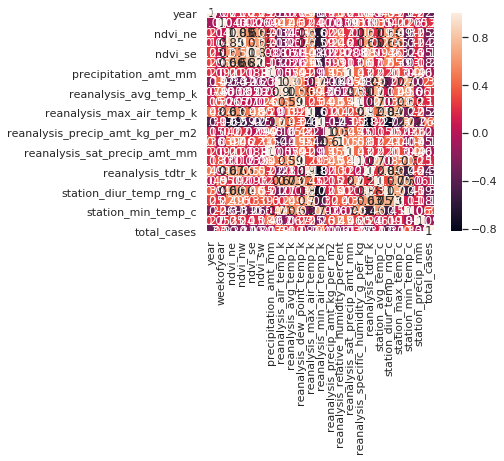

In [ ]:
import seaborn as sns #seaborn es herramiento de visualización

sns.set()
sns.heatmap(df.corr(), square=True, annot=True)

In [ ]:
#Elimino las variables mencionadas al final de la AG1
df_dengue=df.drop(['city','week_start_date','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','ndvi_se', 'ndvi_sw', 'ndvi_ne','reanalysis_air_temp_k'], axis=1)
df_dengue

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.103725,12.42,297.742857,292.414286,299.8,295.9,32.00,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.142175,22.82,298.442857,293.951429,300.9,296.4,17.94,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.172967,34.54,298.878571,295.434286,300.5,297.3,26.10,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.245067,15.36,299.228571,295.310000,301.4,297.0,13.90,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.262200,7.52,299.664286,295.821429,301.9,297.5,12.20,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.318900,55.30,300.771429,296.825714,309.7,294.5,45.00,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,2010,22,0.160371,86.47,299.392857,296.452857,308.5,291.9,207.10,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,2010,23,0.146057,58.94,297.592857,295.501429,305.5,292.4,50.60,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,2010,24,0.245771,59.67,297.521429,295.324286,306.1,291.9,62.33,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
df_dengue.describe()

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,2001.303586,26.497081,0.134362,47.578932,299.243495,295.303517,303.661301,295.583903,41.548791,16.809640,5.136673,27.228617,8.247724,32.569141,22.075480,40.915847,21.197665
std,5.345922,14.895735,0.120743,43.179096,1.261411,1.500510,3.298576,2.590202,44.486750,1.518780,3.593513,1.267688,2.175908,1.950095,1.553057,48.996480,30.856555
min,1990.000000,1.000000,-0.456100,0.000000,294.892857,289.642857,297.800000,286.900000,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1998.000000,14.000000,0.051587,12.550000,298.289286,294.216429,301.100000,293.600000,13.525000,15.654286,2.357143,26.430952,6.592857,31.400000,21.100000,9.700000,4.000000
50%,2002.000000,26.000000,0.126800,41.410000,299.321429,295.682857,302.600000,296.000000,28.600000,17.172857,3.000000,27.450000,7.471429,32.800000,22.100000,24.700000,11.000000
75%,2006.000000,39.000000,0.220714,71.765000,300.221429,296.502143,306.000000,297.900000,54.750000,18.012857,8.028571,28.157143,10.012500,33.900000,23.300000,56.050000,26.000000
max,2010.000000,52.000000,0.454429,390.600000,302.614286,298.450000,313.200000,299.900000,570.500000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,329.000000


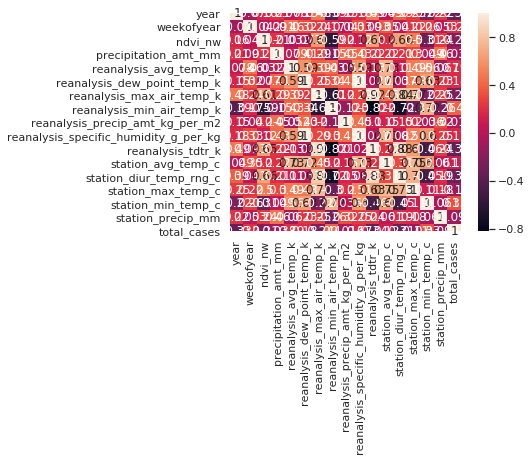

In [ ]:
#Para continuar seleccionando características, voy a realizar un análisis de correlación
import seaborn as sns #seaborn es herramiento de visualización

sns.set()
sns.heatmap(df_dengue.corr(), square=True, annot=True)

No hay ninguna variable que esté muy correlacionada con el número total de casos, por lo que de momento dejo estas variables.

In [ ]:
#Ordeno el data frame por orden cronológico
dengue=df_dengue.sort_values(by=['year', 'weekofyear'])
dengue

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.103725,12.42,297.742857,292.414286,299.8,295.9,32.00,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.142175,22.82,298.442857,293.951429,300.9,296.4,17.94,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.172967,34.54,298.878571,295.434286,300.5,297.3,26.10,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.245067,15.36,299.228571,295.310000,301.4,297.0,13.90,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.262200,7.52,299.664286,295.821429,301.9,297.5,12.20,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,0.318900,55.30,300.771429,296.825714,309.7,294.5,45.00,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,2010,22,0.160371,86.47,299.392857,296.452857,308.5,291.9,207.10,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,2010,23,0.146057,58.94,297.592857,295.501429,305.5,292.4,50.60,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,2010,24,0.245771,59.67,297.521429,295.324286,306.1,291.9,62.33,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
dengue.describe()

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,2001.303586,26.497081,0.134362,47.578932,299.243495,295.303517,303.661301,295.583903,41.548791,16.809640,5.136673,27.228617,8.247724,32.569141,22.075480,40.915847,21.197665
std,5.345922,14.895735,0.120743,43.179096,1.261411,1.500510,3.298576,2.590202,44.486750,1.518780,3.593513,1.267688,2.175908,1.950095,1.553057,48.996480,30.856555
min,1990.000000,1.000000,-0.456100,0.000000,294.892857,289.642857,297.800000,286.900000,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1998.000000,14.000000,0.051587,12.550000,298.289286,294.216429,301.100000,293.600000,13.525000,15.654286,2.357143,26.430952,6.592857,31.400000,21.100000,9.700000,4.000000
50%,2002.000000,26.000000,0.126800,41.410000,299.321429,295.682857,302.600000,296.000000,28.600000,17.172857,3.000000,27.450000,7.471429,32.800000,22.100000,24.700000,11.000000
75%,2006.000000,39.000000,0.220714,71.765000,300.221429,296.502143,306.000000,297.900000,54.750000,18.012857,8.028571,28.157143,10.012500,33.900000,23.300000,56.050000,26.000000
max,2010.000000,52.000000,0.454429,390.600000,302.614286,298.450000,313.200000,299.900000,570.500000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,329.000000


In [ ]:
#Para dividir entre training y test voy a utilizar las semanas del año, por lo que será una división lineal. Lo divido en 40% y 60%.
# 0.1 features and labels

dengue.reset_index(drop=True, inplace=True)
train = dengue.loc[0:len(dengue)*0.4]
test  = dengue.loc[len(dengue)*0.6:,]

test.head()

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
720,2003,52,-0.039800,1.96,299.178571,295.025714,300.8,297.2,9.14,16.375714,2.700000,26.014286,6.500000,30.0,21.1,12.0,22
721,2003,52,0.230656,49.42,297.050000,295.682857,302.6,294.3,82.68,17.172857,4.185714,27.300000,9.600000,33.1,22.3,185.7,1
722,2004,2,0.017200,0.00,297.571429,292.374286,299.3,296.1,20.70,13.881429,2.028571,24.385714,5.557143,27.8,20.6,15.6,20
723,2004,2,0.308850,78.53,298.742857,296.637143,304.0,294.9,55.30,18.255714,6.200000,27.433333,8.666667,34.2,22.4,137.2,5
724,2004,3,0.298440,63.47,298.957143,297.020000,306.2,294.5,62.50,18.712857,6.828571,28.700000,9.900000,34.1,23.1,68.1,8


In [ ]:
#Si los puntos están muy dispersos, 
# reseteamos el index con el fin de no evitar problemas en la validación cruzada
train.reset_index(drop = True, inplace = True)
train.head()

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.103725,12.42,297.742857,292.414286,299.8,295.9,32.00,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.142175,22.82,298.442857,293.951429,300.9,296.4,17.94,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.172967,34.54,298.878571,295.434286,300.5,297.3,26.10,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.245067,15.36,299.228571,295.310000,301.4,297.0,13.90,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.262200,7.52,299.664286,295.821429,301.9,297.5,12.20,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Min Value uniform : 26.247596153846153 (26)
Min Value distance : 26.379478739992418 (26)


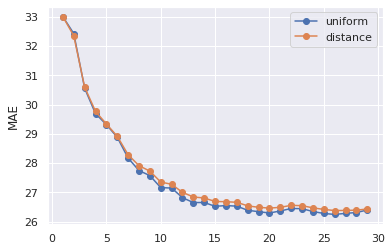

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

#Hacemos validación cruzada, para lo que usamos este código. cv=cross validation
cv = KFold(n_splits = 10, shuffle = False) # Se crea un elemento en el que directamente 
#nosotros creamos un objeto que es un transformador de datos que nos permite 
#poder hacer divisiones de un conjunto de datos sin mezcla. 
#Es decir, usamos el pasado para predecir el futuro.

#Luego hacemos una optimización repetida con dos bucles for, porque son dos parámetros.
#Una con los pesos (si son pesos uniformes o por distancia), y el otro para el número de vecinos.
#En este caso vamos a usar un rango del  1 al 30, porque 30 puede ser un valor bastante alto.
for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['total_cases'], axis=1), 
                               y = f_train['total_cases'])
          y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
          # evaluación del modelo, mediante el cálculo del mae
          mae = mean_absolute_error(f_test['total_cases'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show()

Esta gráfica nos indica que el MAE es ligeramente mejor (inferior) con los vecinos por pesos uniforme (26.24), aunque la diferencia es mínima entre ambas. Por lo que construiré el modelo con k=26 y los pesos uniformes.

In [ ]:
# constructor
#Primero construimos nuestro modelo
#Ahora elegimos nuestros parámetros, que provienen de la gráfica anterior:
#k(numero de vecinos)=7, pesos=uniforme
n_neighbors = 26
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 

# fit and predict
#Después se debe entrenar, con el fit usando los datos de entrenamiento.
#Para la x se usan todos los datos menos la columna de destino, 
#para la y se usa la columna destino, que en este caso es 'count'
knn.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = knn.predict(X = test.drop(['total_cases'], axis = 1))
mae = mean_absolute_error(test['total_cases'], y_pred) #Se obtiene un valor predicho
print ('MAE', mae)

#El resultado del MAE ahora sale mucho más alto. Esto puede ser debido al overfitting
#Sin embargo, ahora estamos trabajando con los datos reales, no con los de entrenamiento
#Lo que nos puede dar otra solución.

MAE 23.255580536373852


In [ ]:
#Guardo el fichero en el disco
# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'date': test.index, 'result': res}) #Este es el archivo que se somete en la competicion
#output = pd.DataFrame({ 'date': city, 'total_cases': res})


from google.colab import files

with open('Nuche_result_dengue-27Oct2019_knn_train.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('Nuche_result_dengue-27Oct2019_knn_train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


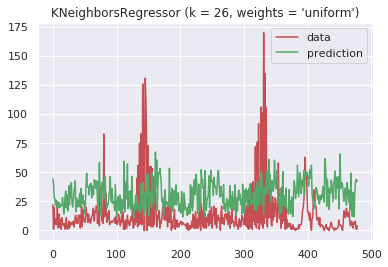

In [ ]:
#Probamos y visualizamos cómo ha quedado la predicción con la realidad
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['total_cases'].shape[0]))
plt.plot(xx, test['total_cases'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

Ahora voy a utilizar la base de datos test para someter los resultados a la competición

In [ ]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dengue_features_test.csv to dengue_features_test.csv
User uploaded file "dengue_features_test.csv" with length 82465 bytes


In [ ]:
dengue_test=pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
dengue_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [ ]:
#Sustituyo los valores nulos por su media
df=dengue_test.fillna(dengue_test.mean())
df.isnull().values.any()

False

In [ ]:
#Elimino las variables mencionadas al final de la AG1
dengue_test=df.drop(['week_start_date','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','ndvi_se', 'ndvi_sw', 'ndvi_ne','reanalysis_air_temp_k'], axis=1)
dengue_test

,city,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,-0.018900,78.60,298.550000,294.527143,301.1,296.4,25.37,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,-0.012400,12.56,298.557143,294.395714,300.8,296.7,21.83,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,0.126803,3.66,299.357143,295.308571,302.2,296.4,4.12,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,-0.019867,0.00,299.728571,294.402857,303.0,296.9,2.20,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,0.039833,0.76,299.671429,294.760000,302.3,297.3,4.36,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,0.380029,41.12,298.964286,295.638571,305.5,292.7,67.60,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,0.296343,71.52,298.328571,295.845714,306.3,291.6,45.70,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,0.251029,78.96,296.607143,294.894286,304.6,290.7,45.22,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,0.302700,39.54,297.400000,293.648571,305.9,292.5,4.70,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [ ]:
# constructor

# fit and predict
#Después se debe entrenar, con el fit usando los datos de entrenamiento.
#Para la x se usan todos los datos menos la columna de destino, 
#para la y se usa la columna destino, que en este caso es 'count'
knn.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = knn.predict(X = dengue_test.drop(['city'], axis = 1))

# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'city':dengue_test['city'],'year':dengue_test['year'],'weekofyear':dengue_test['weekofyear'],'total_cases': res}) #Este es el archivo que se somete en la competicion


from google.colab import files

with open('Nuche_dengue_result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('Nuche_dengue_result.csv')

Ahora voy a probar el modelo Ensembles-Regression

In [ ]:
#Parto de la tabla train en la que se unieron train_features y train_labels
dengue

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.103725,12.42,297.742857,292.414286,299.8,295.9,32.00,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.142175,22.82,298.442857,293.951429,300.9,296.4,17.94,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.172967,34.54,298.878571,295.434286,300.5,297.3,26.10,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.245067,15.36,299.228571,295.310000,301.4,297.0,13.90,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.262200,7.52,299.664286,295.821429,301.9,297.5,12.20,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2010,21,0.318900,55.30,300.771429,296.825714,309.7,294.5,45.00,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1195,2010,22,0.160371,86.47,299.392857,296.452857,308.5,291.9,207.10,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1196,2010,23,0.146057,58.94,297.592857,295.501429,305.5,292.4,50.60,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1197,2010,24,0.245771,59.67,297.521429,295.324286,306.1,291.9,62.33,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
# 0.1 features and labels
#Divido la tabla en dos para tener un grupo de entrenamiento y otro como valores reales

dengue.reset_index(drop=True, inplace=True)
train = dengue.loc[0:len(dengue)*0.4]
test  = dengue.loc[len(dengue)*0.6:,]

display_side_by_side(train.tail(),test.head())

,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
475,2001,18,0.17900,94.77,298.650000,295.740000,305.6,293.1,103.87,17.305714,7.414286,27.625000,11.325000,35.2,20.5,51.0,0
476,2001,19,0.07050,59.89,299.500000,295.365714,302.0,297.4,16.80,16.771429,3.200000,27.485714,7.057143,32.2,22.8,64.3,13
477,2001,19,0.18860,45.56,298.200000,296.332857,305.1,292.1,85.90,17.891429,7.085714,26.600000,8.800000,32.7,21.4,66.0,0
478,2001,20,0.09410,77.36,299.257143,295.855714,301.7,297.3,78.10,17.268571,2.942857,27.857143,6.042857,32.2,24.4,60.5,8
479,2001,21,0.07736,35.54,299.985714,295.345714,302.2,297.6,2.00,16.730000,3.828571,28.828571,8.328571,33.9,23.3,7.4,8
,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
720,2003,52,-0.039800,1.96,299.178571,295.025714,300.8,297.2,9.14,16.375714,2.700000,26.014286,6.500000,30.0,21.1,12.0,22
721,2003,52,0.230656,49.42,297.050000,295.682857,302.6,294.3,82.68,17.172857,4.185714,27.300000,9.600000,33.1,22.3,185.7,1
722,2004,2,0.017200,0.00,297.571429,292.374286,299.3,296.1,20.70,13.881429,2.028571,24.385714,5.557143,27.8,20.6,15.6,20
723,2004,2,0.308850,78.53,298.742857,296.637143,304.0,294.9,55.30,18.255714,6.200000,27.433333,8.666667,34.2,22.4,137.2,5


In [ ]:
train.reset_index(drop = True, inplace = True)

No handles with labels found to put in legend.


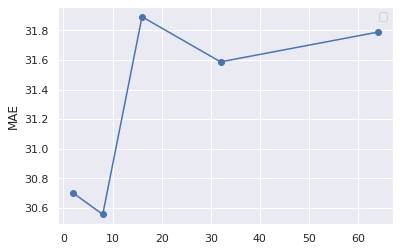

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False, random_state=0) # Le damos aleatoridad

#En este caso optimizamos el numero de arboles que queremos que tenga el random forests
#Optimizamos de forma exponencial, a diferencia de los casos anteriores que lo haciamos de forma lineal
#La profundidad de todos los arboles es la maxima, para que sobreaprendan lo maximo,
#ya que la union de los arboles hace la optimizacion
l_estimators = [2, 8, 16, 32, 64] #, 128, 256, 512, 1024]

total_scores = []
for estimators in l_estimators:
   fold_accuracy = []
   regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='mae', random_state=0)
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['total_cases'], axis=1), 
                           y = f_train['total_cases'])
      y_pred = regressor.predict(X = f_test.drop(['total_cases'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['total_cases'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


  
plt.plot(l_estimators, total_scores, marker='o')
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [ ]:
best_est = l_estimators[np.argmin(total_scores)]
best_mae = min(total_scores)
print ("Min Value (estimators = %i, MAE = %6.2f)"  % (best_est, best_mae))

Min Value (estimators = 8, MAE =  30.56)


In [ ]:
# constructor
regressor =  RandomForestRegressor(n_estimators= best_est, criterion='mae', 
                                   random_state=0)
# fit and predict

regressor.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = regressor.predict(X = test.drop(['total_cases'], axis = 1))
mae = mean_absolute_error(test['total_cases'], y_pred)
print ('MAE', mae)

MAE 11.96659707724426


In [ ]:
# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'date': test.index, 'Nuche_result_ERegression': res})


from google.colab import files

with open('Nuche_result_ERegression.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('Nuche_result_ERegression.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


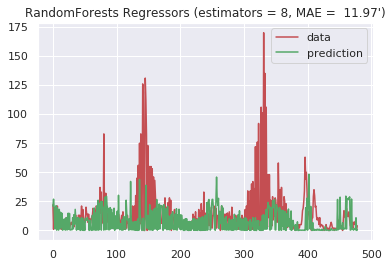

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(test['total_cases'].shape[0]))
plt.plot(xx, test['total_cases'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressors (estimators = %i, MAE = %6.2f')" % (best_est, mae))

plt.show()

In [ ]:
#Parto de la tabla con las variables seleccionadas y 
dengue_test

,city,year,weekofyear,ndvi_nw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,-0.018900,78.60,298.550000,294.527143,301.1,296.4,25.37,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,-0.012400,12.56,298.557143,294.395714,300.8,296.7,21.83,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,0.126803,3.66,299.357143,295.308571,302.2,296.4,4.12,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,-0.019867,0.00,299.728571,294.402857,303.0,296.9,2.20,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,0.039833,0.76,299.671429,294.760000,302.3,297.3,4.36,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,0.380029,41.12,298.964286,295.638571,305.5,292.7,67.60,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,0.296343,71.52,298.328571,295.845714,306.3,291.6,45.70,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,0.251029,78.96,296.607143,294.894286,304.6,290.7,45.22,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,0.302700,39.54,297.400000,293.648571,305.9,292.5,4.70,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [ ]:
# constructor
regressor =  RandomForestRegressor(n_estimators= best_est, criterion='mae', 
                                   random_state=0)
# fit and predict

regressor.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = regressor.predict(X = dengue_test.drop(['city'], axis = 1))

# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'city':dengue_test['city'],'year':dengue_test['year'],'weekofyear':dengue_test['weekofyear'],'total_cases': res})


from google.colab import files

with open('Nuche_dengue_result_ERegression.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('Nuche_dengue_result_ERegression.csv')